## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

###  The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Reading and Understanding the Data

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [4]:
bike.shape

(730, 16)

### DATA QUALITY CHECK

In [5]:
# checking Null Values

round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### There are no Null Values

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#No Duplicates found.
bike.duplicated().sum()

0

1. Data has 730 rows and 16 columns
2. Data doesnt contain any null or duplicated values
3. Data has some fields that are categorical in nature, but in integer/float type

## Data Preparation

Handling Categorical Variables

In [9]:
# Assigning string values to numeric values of season. 

# 1=spring
bike.loc[(bike['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike.loc[(bike['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike.loc[(bike['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike.loc[(bike['season'] == 4) , 'season'] = 'winter'

In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Checking the converted values and its count

bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# working on value of yr

bike['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# Assigning string values to numeric values of month
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike[['mnth']] = bike[['mnth']].apply(object_map)

In [14]:
# Checking the values of Month and its count
bike['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [15]:
# Checking whether whether day is a holiday or not (0: No, 1: Yes)
bike['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
# Assigning string values to numeric values of Weekday
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
bike[['weekday']] = bike[['weekday']].apply(str_map)

In [17]:
# Checking the values of Weekday and its count
bike['weekday'].astype('category').value_counts()

Thurs    105
Wed      105
Fri      104
Mon      104
Sat      104
Sun      104
Tues     104
Name: weekday, dtype: int64

In [18]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0

bike['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [19]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike.loc[(bike['weathersit'] == 1) , 'weathersit'] = 'F'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike.loc[(bike['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike.loc[(bike['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.loc[(bike['weathersit'] == 4) , 'weathersit'] = 'D'

In [20]:
# Checking the values of Weathersit and its count

bike['weathersit'].astype('category').value_counts()

F    463
B    246
C     21
Name: weathersit, dtype: int64

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [22]:
bike.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Visualisation and Data Preparation

In [23]:
#importing the libraries

import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
#importing the Linear Regression Libraries

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [25]:
num = bike[['temp','atemp','hum','windspeed','cnt']]

<Axes: xlabel='windspeed', ylabel='cnt'>

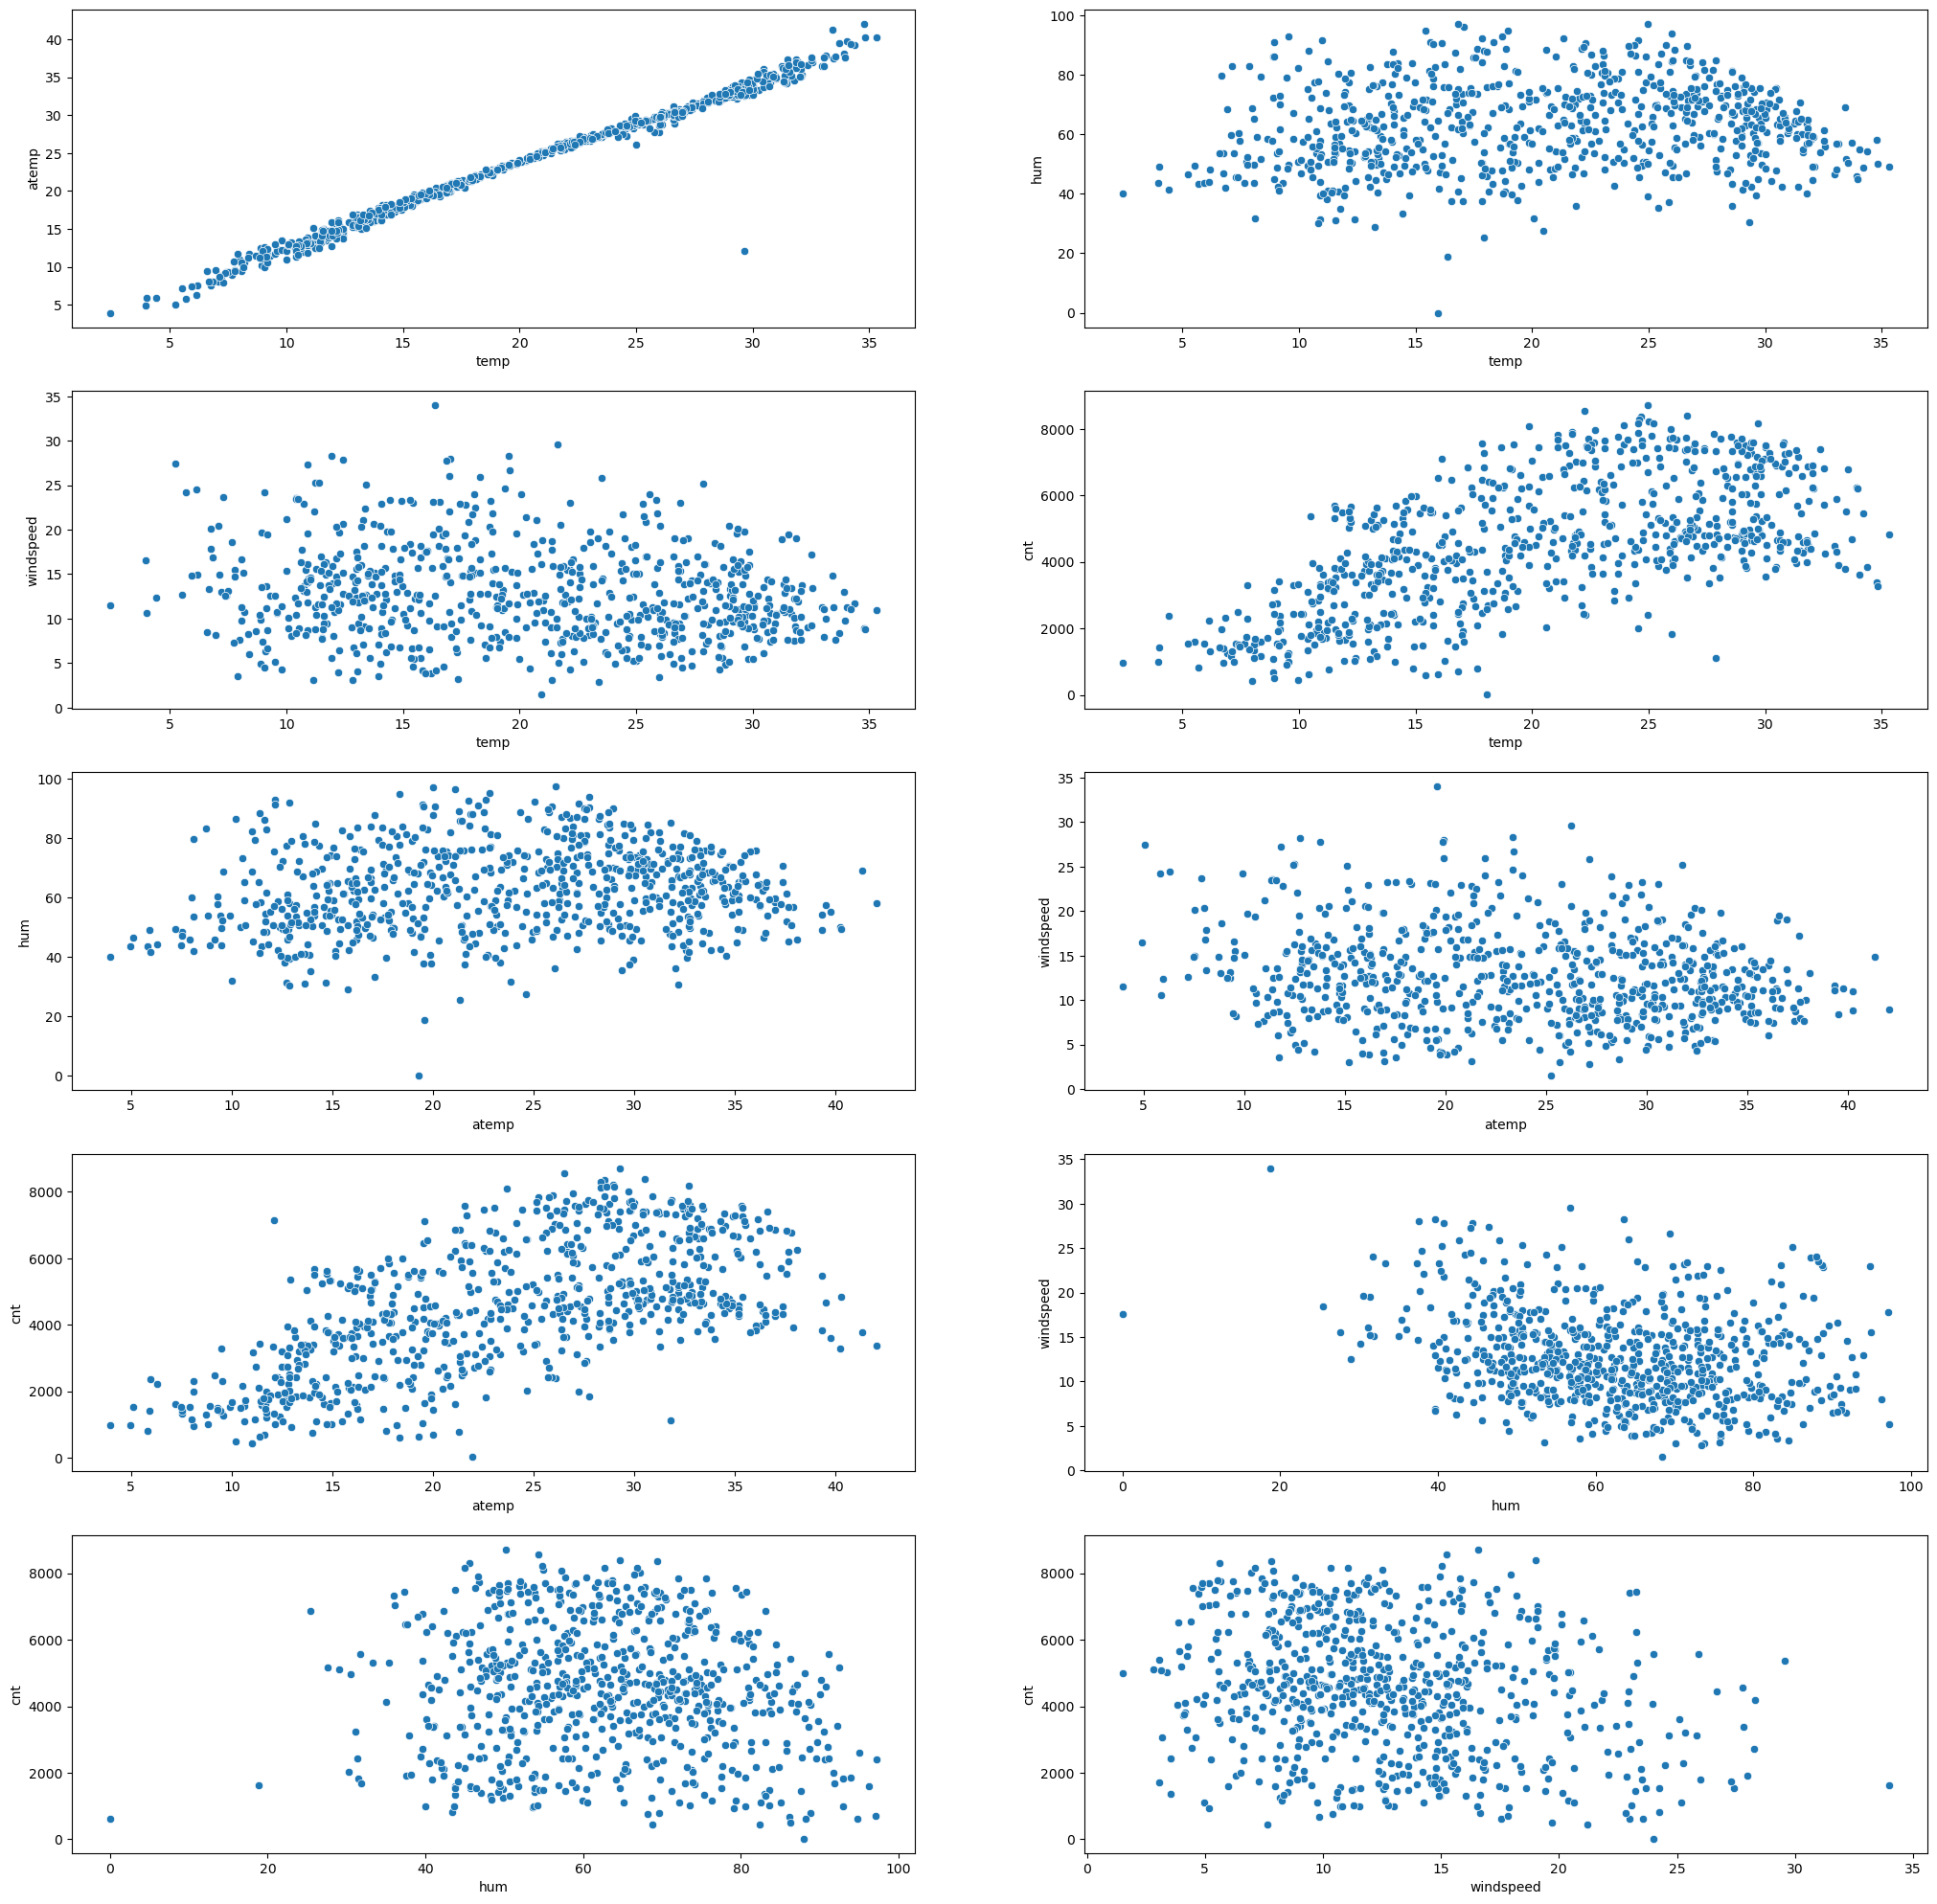

In [26]:
plt.figure(figsize=(25, 25))
plt.subplot(5,2,1)
sns.scatterplot(x = 'temp', y = 'atemp', data = bike)
plt.subplot(5,2,2)
sns.scatterplot(x = 'temp', y = 'hum', data = bike)
plt.subplot(5,2,3)
sns.scatterplot(x = 'temp', y = 'windspeed', data = bike)
plt.subplot(5,2,4)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(5,2,5)
sns.scatterplot(x = 'atemp', y = 'hum', data = bike)
plt.subplot(5,2,6)
sns.scatterplot(x = 'atemp', y = 'windspeed', data = bike)
plt.subplot(5,2,7)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bike)
plt.subplot(5,2,8)
sns.scatterplot(x = 'hum', y = 'windspeed', data = bike)
plt.subplot(5,2,9)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(5,2,10)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike)


In [27]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    bike[var] = bike[var].astype("float")


In [28]:
# All numeric variables in the dataset
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


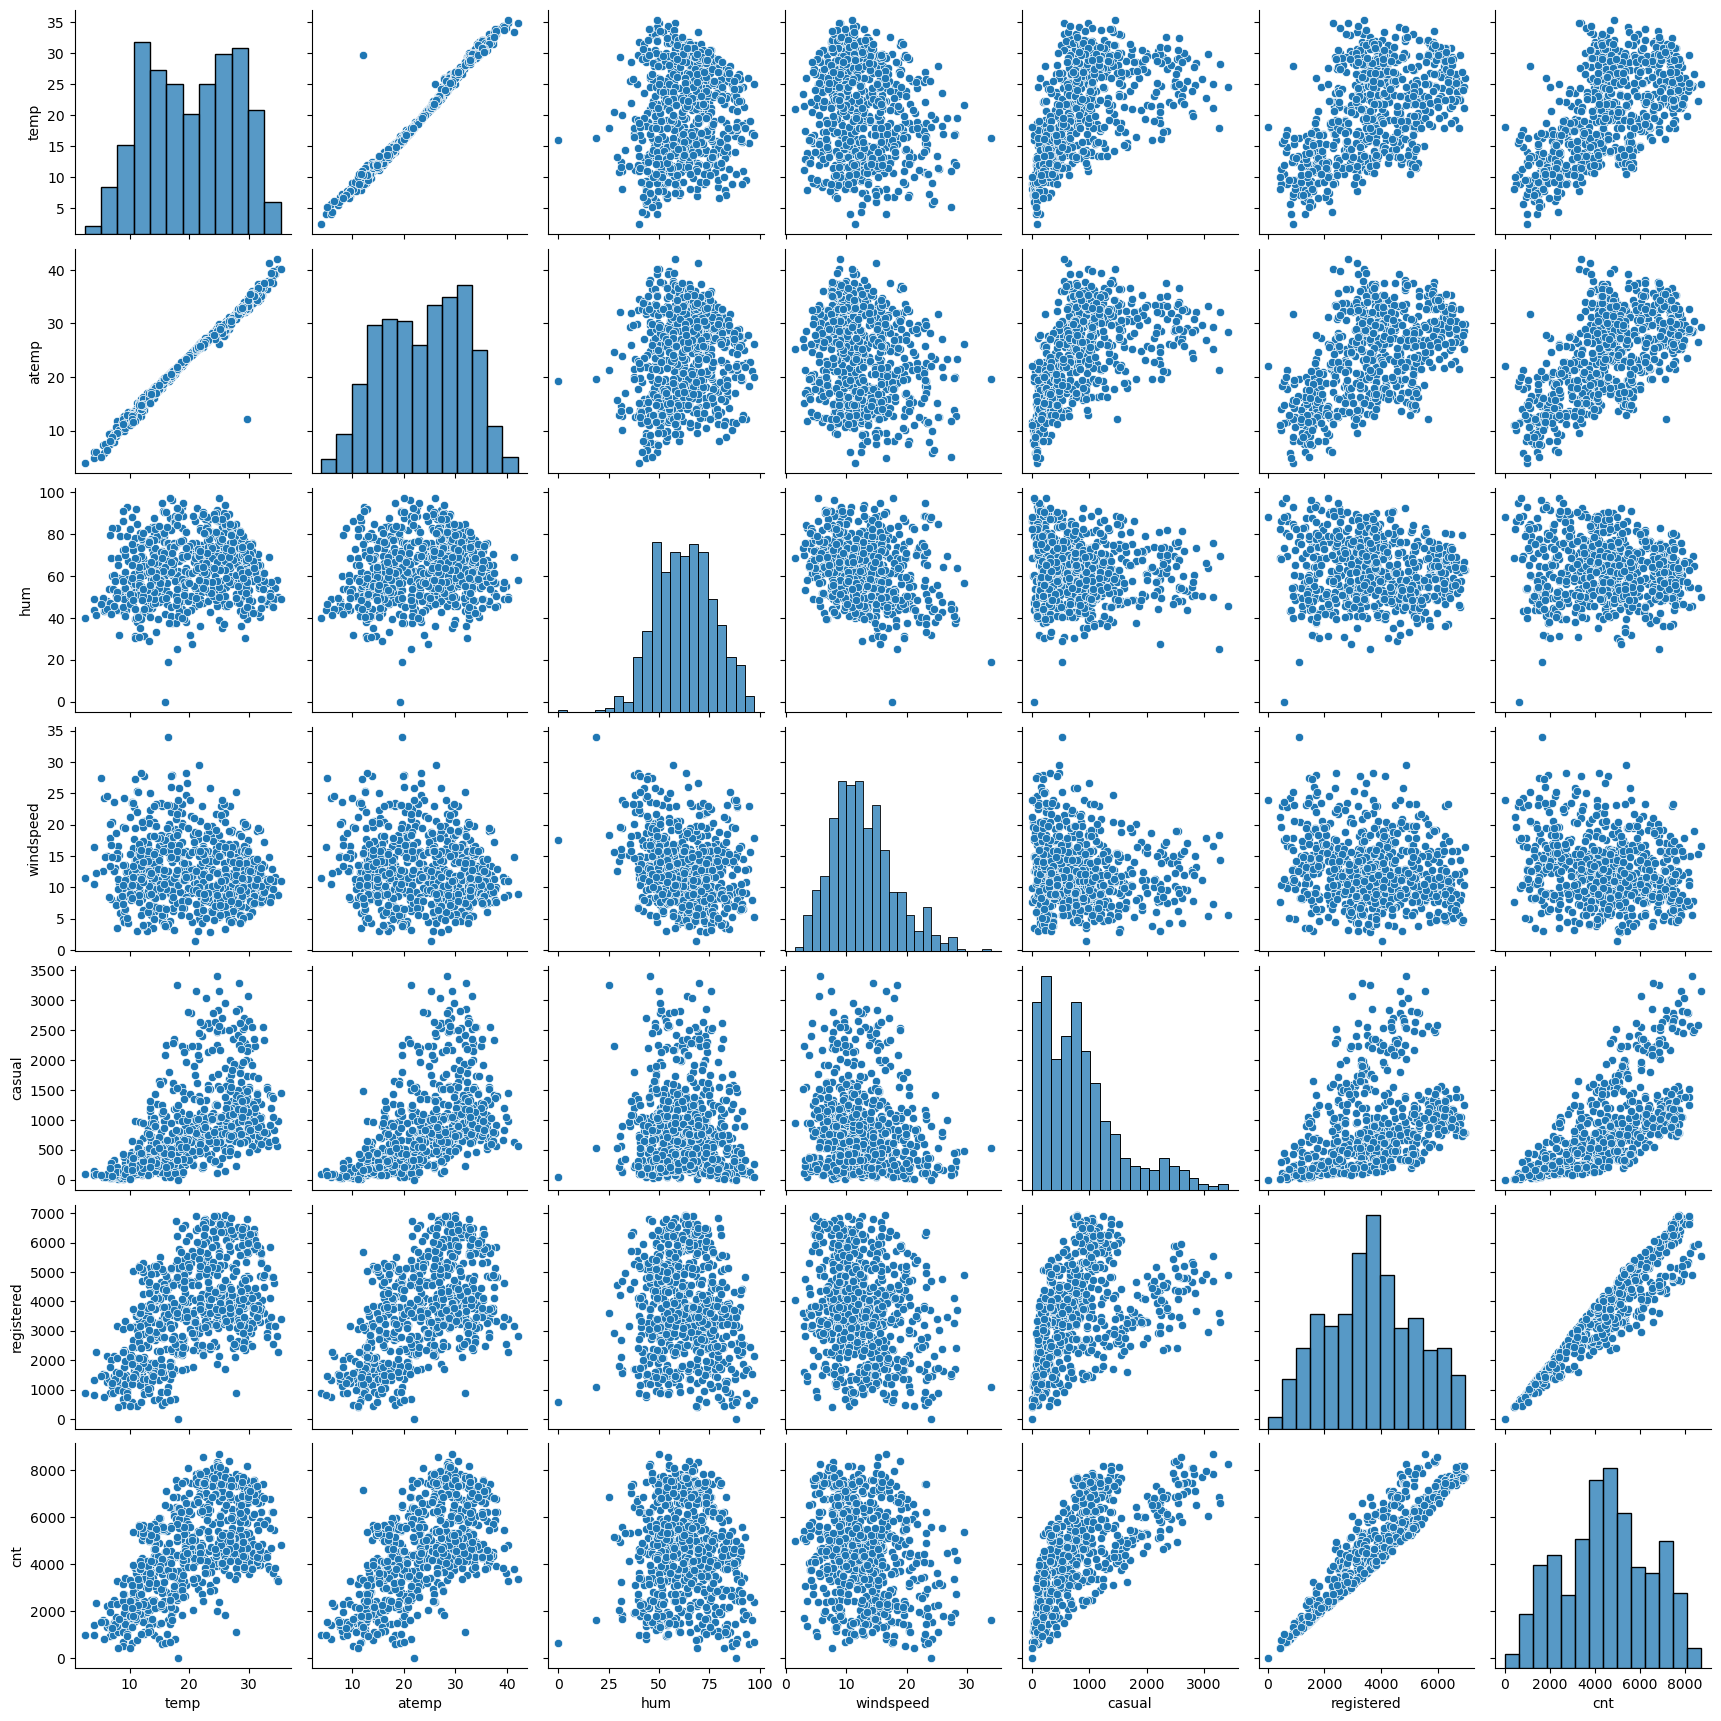

In [29]:
# Pairwise scatter plot
sns.pairplot(bike_numeric)
plt.show()

#### Insights from Numerical Variables:


There is Linear relation observed between 'temp','atemp' and 'cnt'

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [30]:
# Converting date to datetime format
bike['dteday']=bike['dteday'].astype('datetime64')

In [31]:
# All categorical variables in the dataset

bike_categorical=bike.select_dtypes(include=['object'])
print(bike_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [32]:
bike_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,F
3,spring,Jan,Sat,F
4,spring,Jan,Sun,F
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,F


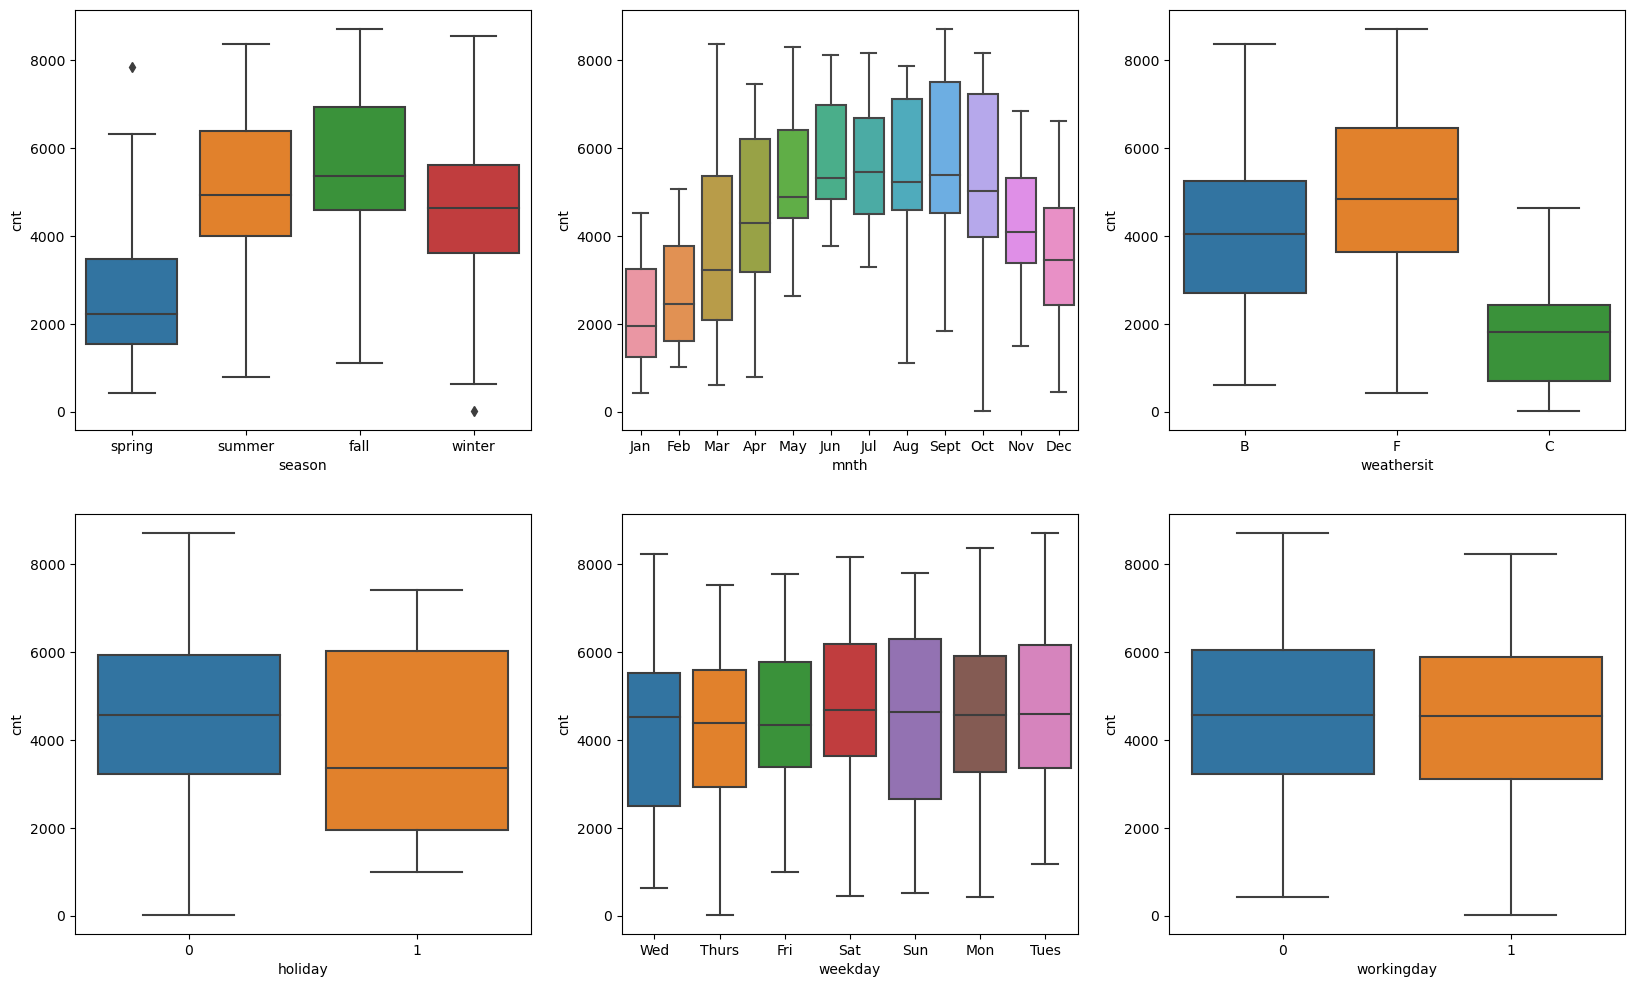

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Insights from Categorical Variables:

1. The dataset comprised 6 categorical variables.
2. Box plots were employed to assess their impact on the dependent variable ('cnt').

#### Key observations:
1. Season: Around 32% of bike bookings occurred in season 3 (fall), followed by season 2 (summer) and season 4 (winter) at 27% and 25%, respectively. Season appears to be a potential predictor for the dependent variable.
2. Month: Approximately 10% of bike bookings took place in months 5, 6, 7, 8, and 9, with a median exceeding 4000 bookings per month. Month displays a discernible trend and could be a valuable predictor.
3. Weathersit: Nearly 67% of bike bookings happened during 'weathersit1,' with a median close to 5000 bookings. Weathersit2 followed with 30% of total bookings. Weathersit demonstrates a trend and may be a useful predictor.
4. Holiday: A striking 97.6% of bike bookings occurred on non-holidays, indicating a biased dataset. Holiday is unlikely to be a reliable predictor.
5. Weekday: The weekday variable exhibits a consistent trend, contributing 13.5%-14.8% of total bookings across all days with medians ranging from 4000 to 5000. Its influence on the predictor is uncertain and left to the model's discretion.
6. Workingday: About 69% of bike bookings took place on 'workingday,' suggesting it could be a meaningful predictor for the dependent variable

### Correlation matrix

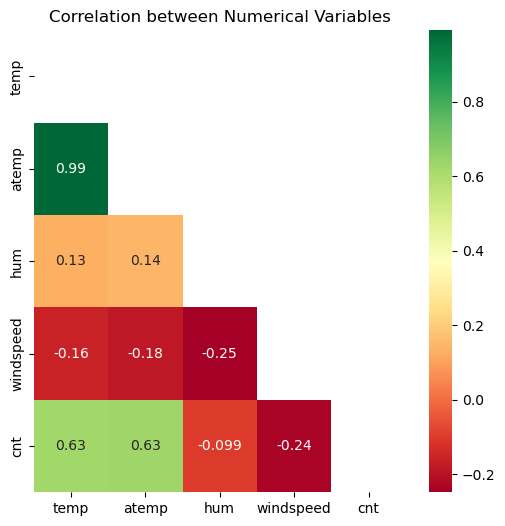

In [34]:
plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

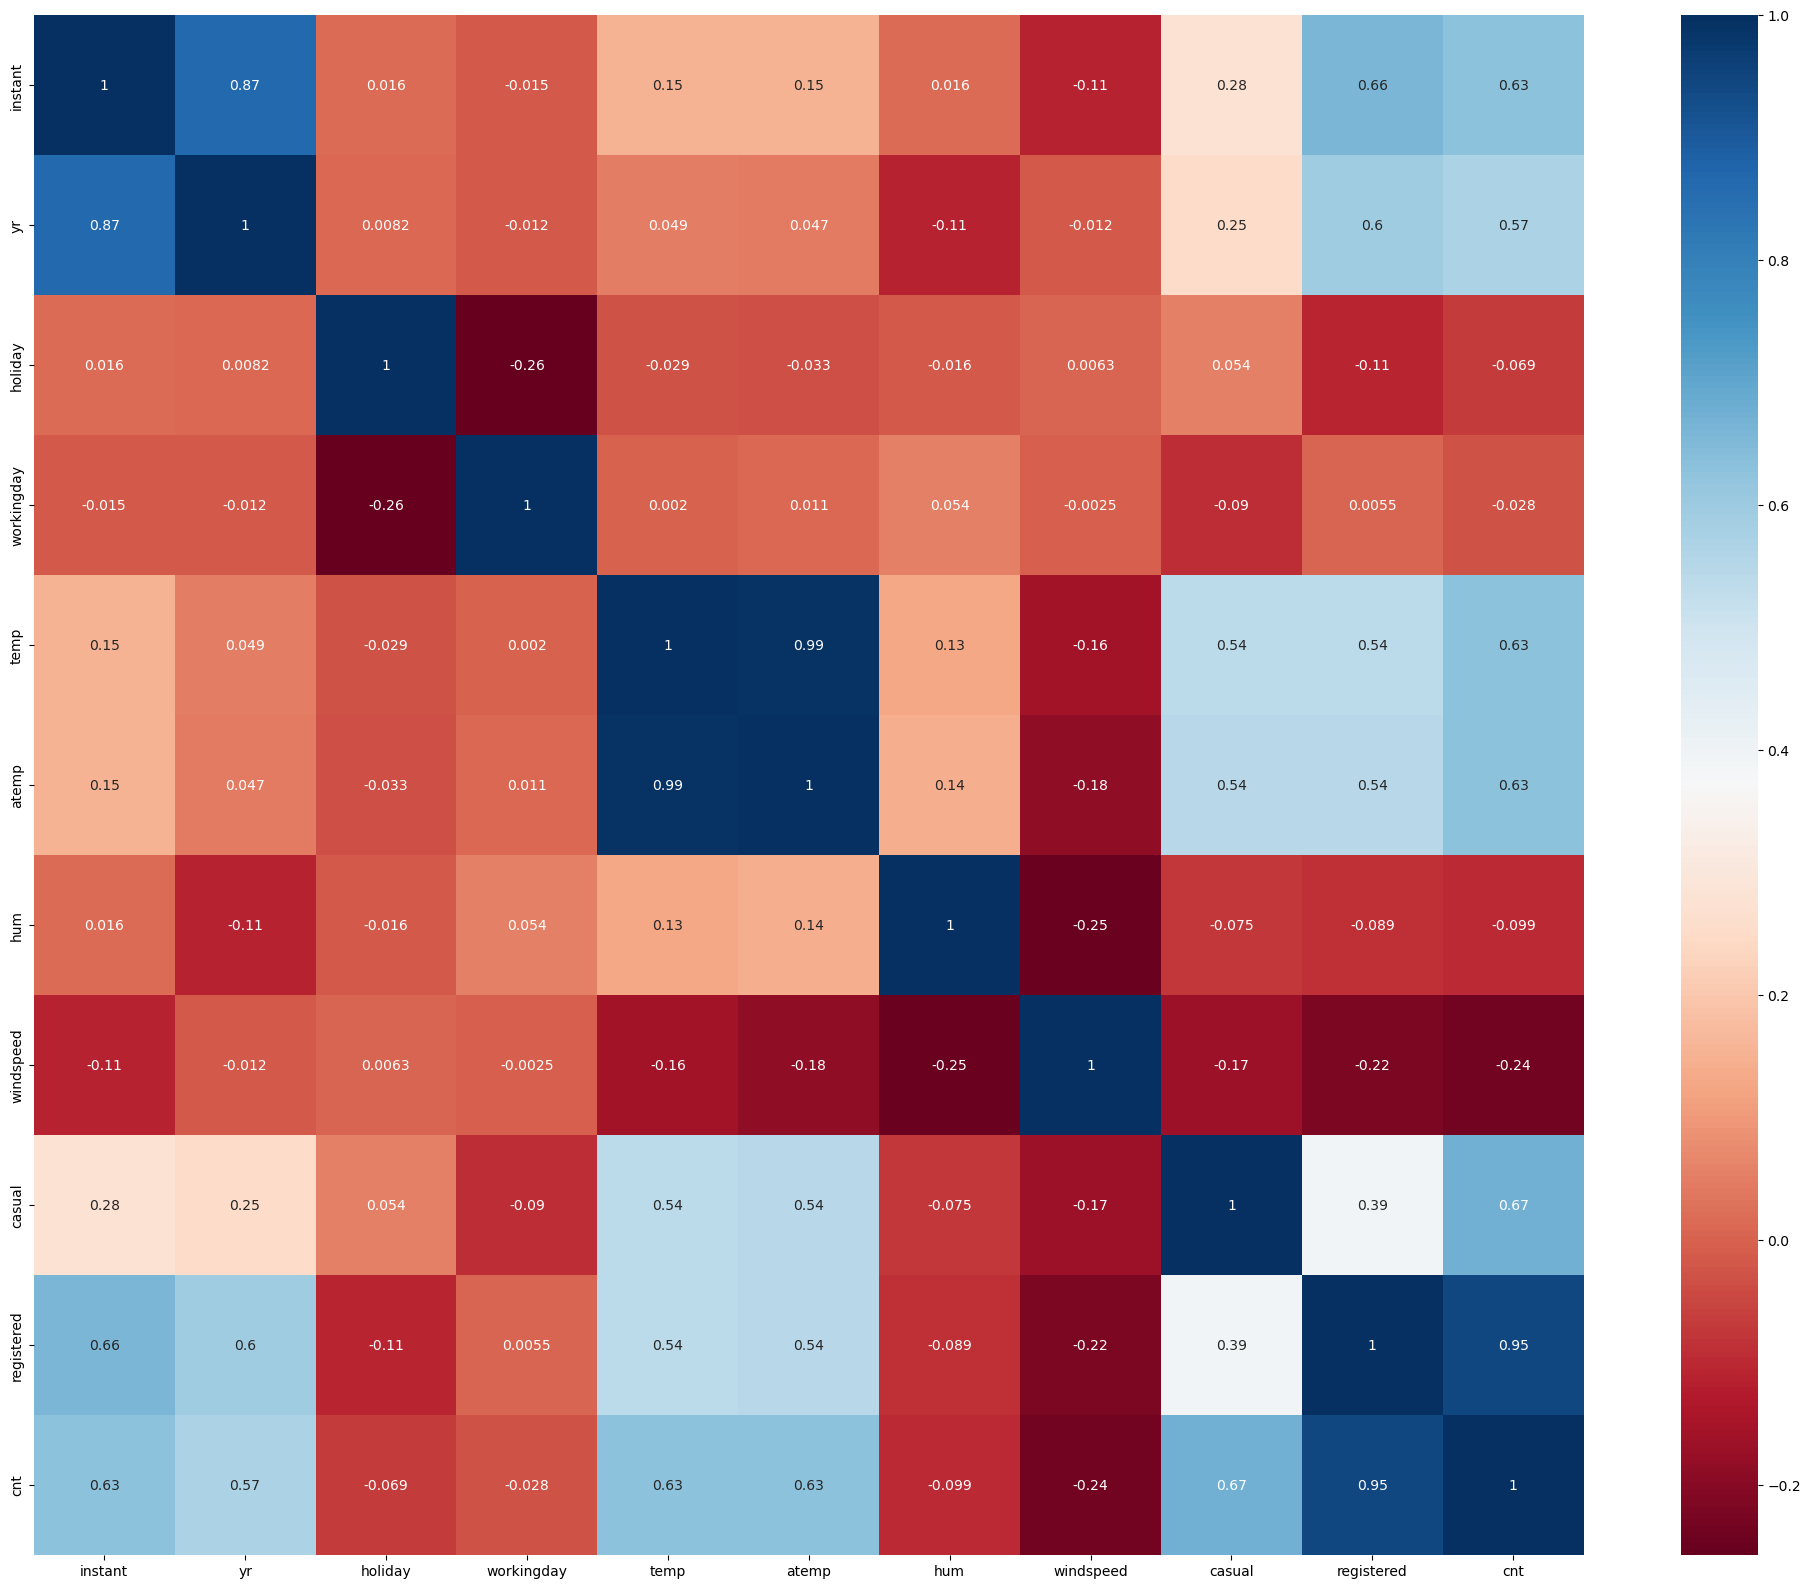

In [35]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()


#### Insights:

The heatmap indicates multicollinearity among variables and highlights their correlation with the target variable. We'll use this map during linear model construction to assess correlations, VIF, and p-values for selecting or eliminating variables.

temp and atemp are highly correlated.

In [36]:
#removing atemp as it is highly correlated with temp
bike.drop('atemp',axis=1,inplace=True)  

In [37]:
## There is no Variables where Yes/NO to be converted to Binary in data Set

### Dummy Variable


We'll generate dummy variables for the categorical variables 'mnth,' 'weekday,' 'season,' and 'weathersit.' The following code accomplishes three tasks:

1. Creates dummy variables.
2. Removes the original variable for which the dummy was generated.
3. Excludes the first dummy variable for each set of created dummies.

In [38]:
bike_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [39]:
# Convert Categorical veriables into dummies
bike_dummies = pd.get_dummies(bike_categorical, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [40]:
# Drop categorical variable columns
bike = bike.drop(list(bike_categorical.columns), axis=1)

In [41]:
# Concatenate dummy variables with the original dataframe
bike = pd.concat([bike, bike_dummies], axis=1)

In [42]:
#Checking if all Variables are NUmberical format or not
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,1,0,0,0,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,1,0,0,0,0,0,1
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bike=bike.drop(['instant','dteday'], axis = 1, inplace = False)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,1,0,0,0,0,1


## Splitting the Data into Training and Testing Sets

Data Split for Training and Testing: We will partition the data into training and testing sets using the train_test_split method from the sklearn package, adhering to a 70:30 ratio.

#### Spliting of Data

In [46]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.75, test_size=0.25, random_state=50)

In [47]:
df_train.shape

(547, 31)

In [48]:
df_test.shape

(183, 31)

#### Scaling

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.  There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [51]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,1,0.353092,0.904250,0.189757,879.0,1576.0,0.279913,0,...,0,0,0,0,0,0,0,1,0,0
396,1,0,1,0.510926,0.523401,0.310919,304.0,4275.0,0.524275,1,...,0,0,0,0,1,0,0,0,0,1
175,0,0,1,0.792325,0.498067,0.355294,1782.0,3420.0,0.595950,0,...,0,0,0,0,0,0,0,1,0,1
454,1,0,0,0.454854,0.760841,0.444127,2301.0,3934.0,0.714795,0,...,0,0,0,0,0,0,1,0,0,0
234,0,0,1,0.724830,0.469300,0.219363,1281.0,4614.0,0.675679,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.486289,0.025594,0.696527,0.539238,0.643969,0.317546,828.853748,3634.594150,0.510981,0.248629,...,0.084095,0.063985,0.146252,0.149909,0.13894,0.146252,0.135283,0.137112,0.029250,0.628885
std,0.500269,0.158066,0.460179,0.225899,0.147268,0.167984,677.032972,1567.077246,0.223525,0.432614,...,0.277784,0.244951,0.353682,0.357309,0.34620,0.353682,0.342339,0.344280,0.168662,0.483545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.528982,0.197183,309.500000,2472.500000,0.352163,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538962,0.645771,0.294759,695.000000,3658.000000,0.519673,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.743521,0.750751,0.406464,1056.000000,4742.500000,0.676254,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6911.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


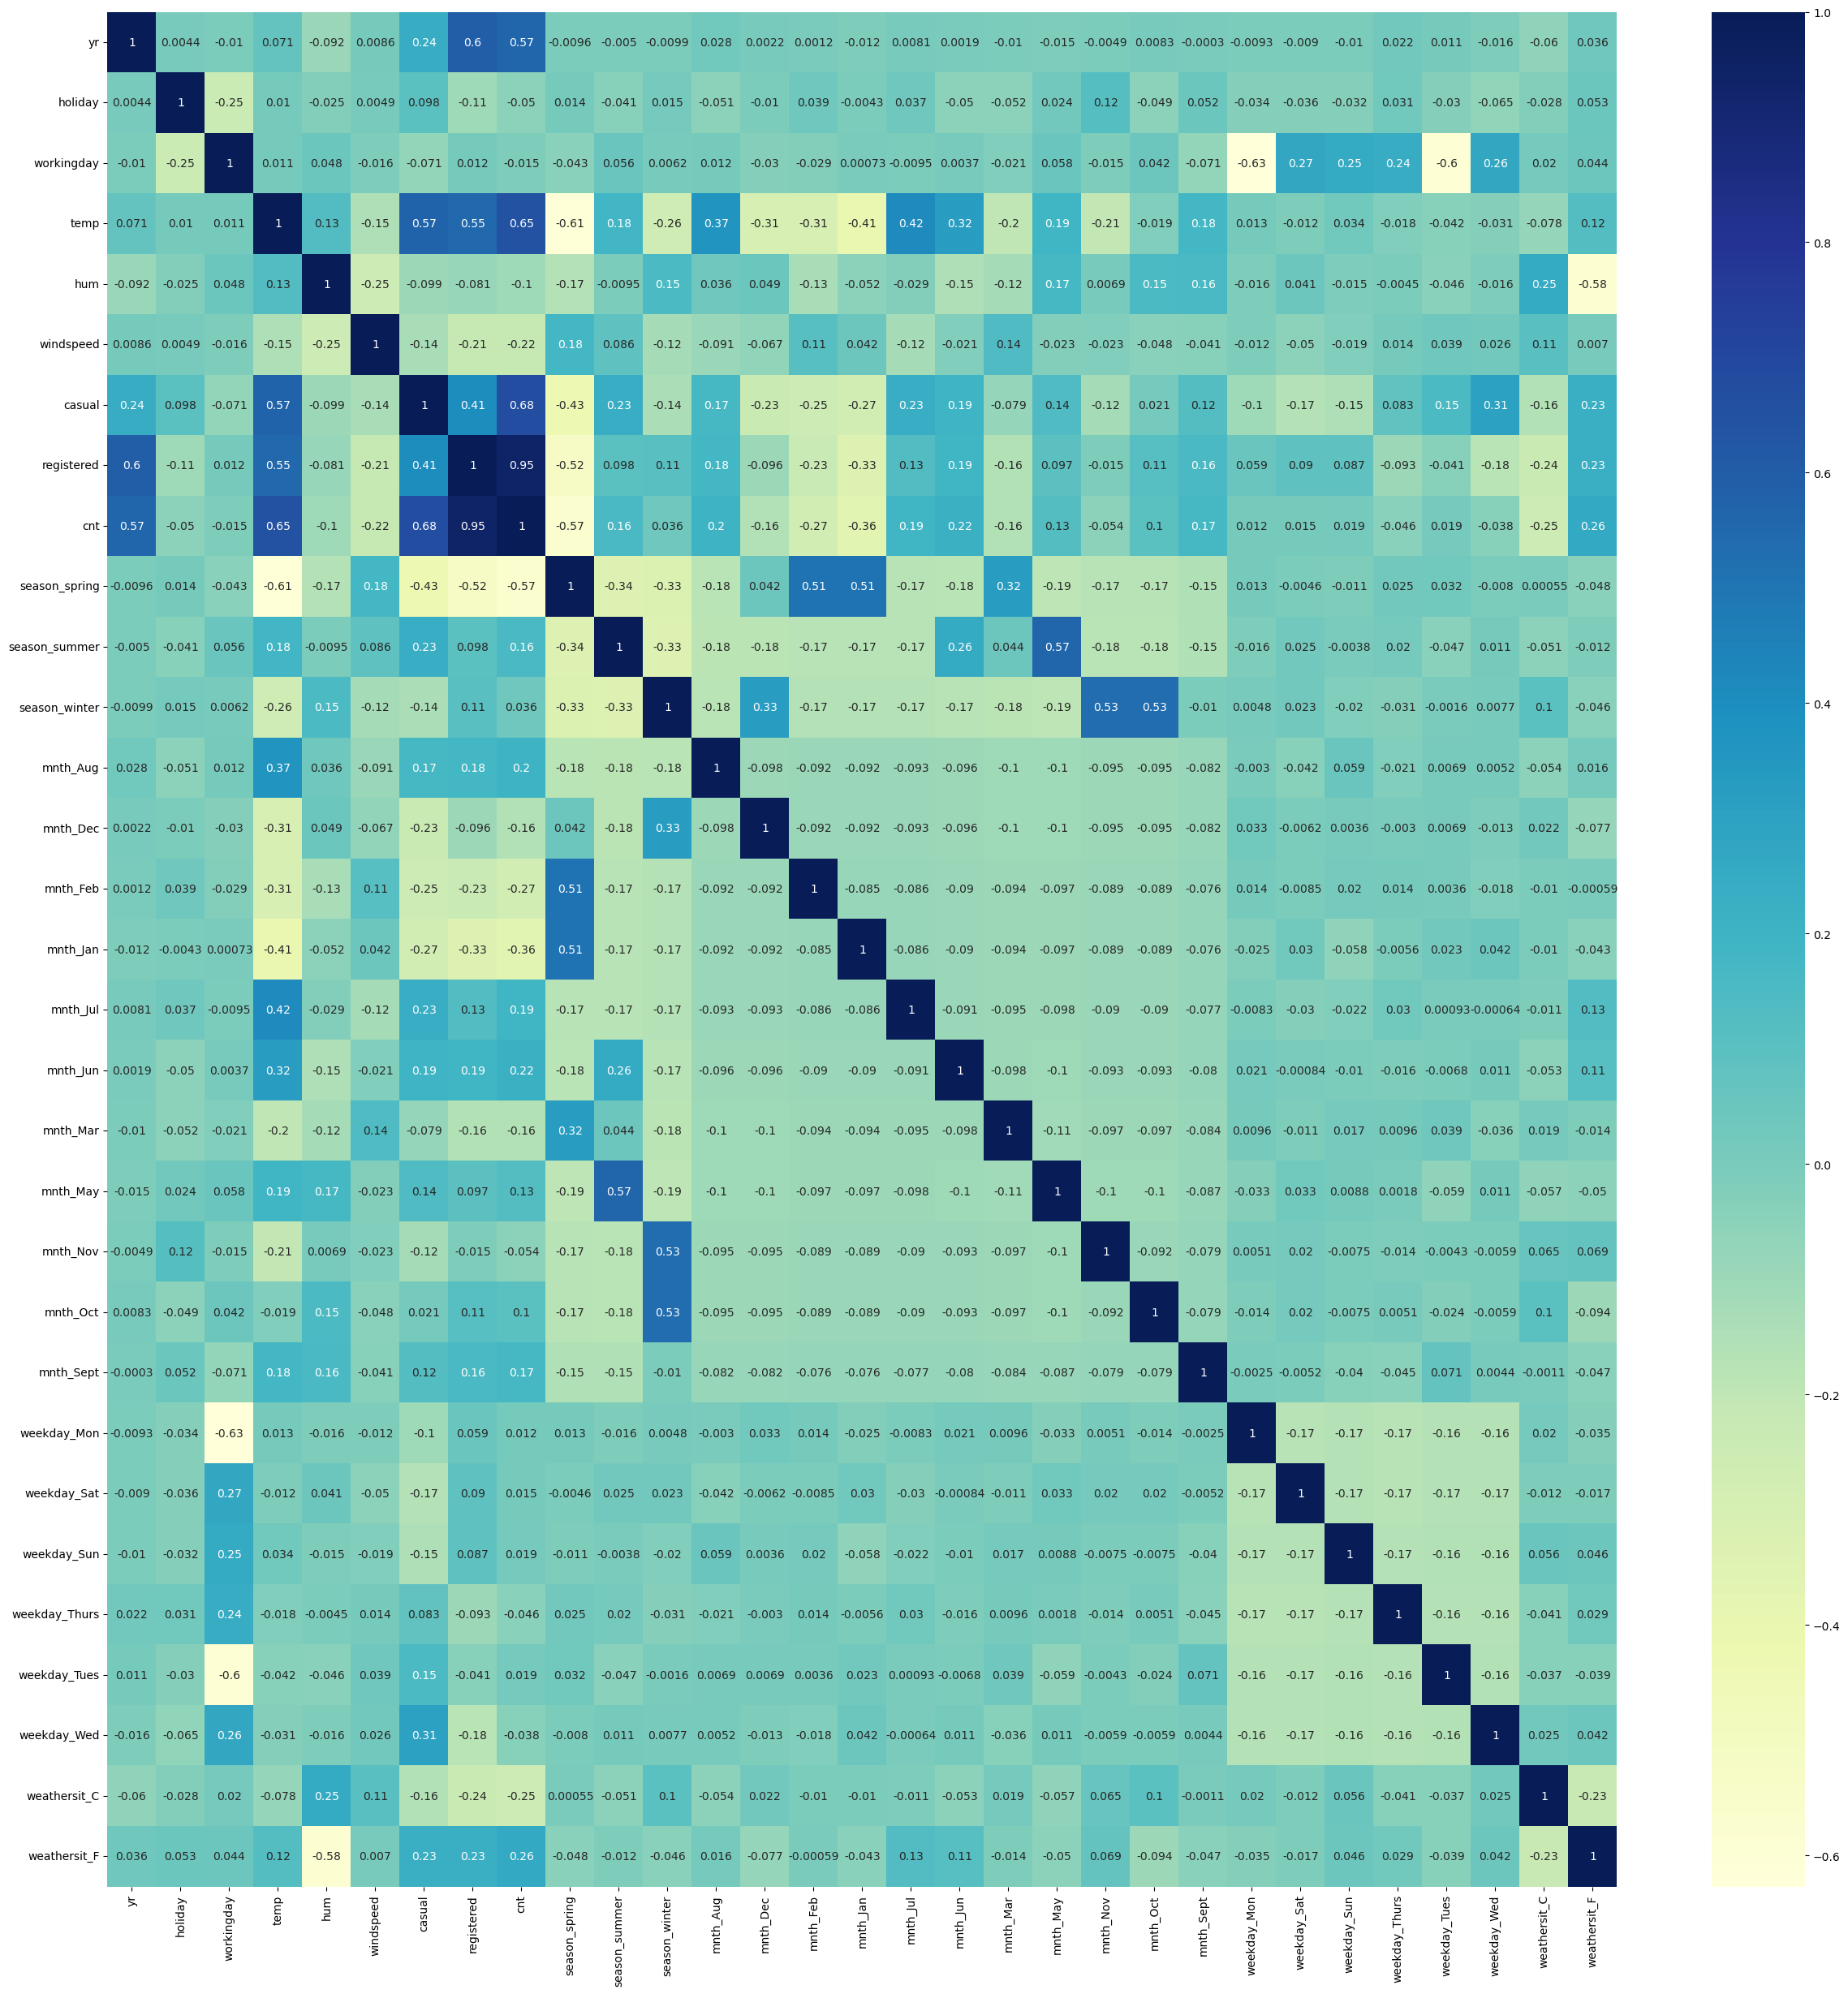

In [53]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

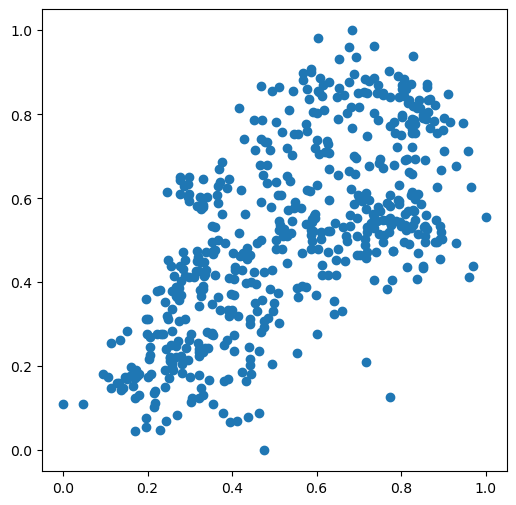

In [54]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## Building Linear Model

#### Dividing into X and Y sets for the model building

In [55]:
import statsmodels.api as sm

In [56]:
# Dropping 'casual' and 'registered' as together they add up to cnt

y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [57]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,1,0.353092,0.904250,0.189757,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
396,1,0,1,0.510926,0.523401,0.310919,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
175,0,0,1,0.792325,0.498067,0.355294,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
454,1,0,0,0.454854,0.760841,0.444127,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
234,0,0,1,0.724830,0.469300,0.219363,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [58]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [59]:
X_train.shape

(547, 28)

In [60]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 6),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 8),
 ('weekday_Thurs', False, 3),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 4),
 ('weathersit_C', True, 1),
 ('weathersit_F', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_May', 'mnth_Nov', 'mnth_Sept',
       'weekday_Mon', 'weekday_Tues', 'weathersit_C', 'weathersit_F'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
2      workingday  58.03
4             hum  37.96
3            temp  29.38
16    weekday_Mon  12.67
17   weekday_Tues  11.46
6   season_spring   8.23
8   season_winter   5.49
5       windspeed   5.32
7   season_summer   4.85
19   weathersit_F   4.49
1         holiday   2.69
12       mnth_Jan   2.24
11       mnth_Feb   2.07
14       mnth_Nov   2.05
0              yr   2.00
10       mnth_Dec   1.84
13       mnth_May   1.78
9        mnth_Aug   1.74
15      mnth_Sept   1.44
18   weathersit_C   1.18


In [68]:
import statsmodels.api as sm

In [69]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const            0.365529
yr               0.229844
holiday         -0.124500
workingday      -0.052926
temp             0.425291
hum             -0.195216
windspeed       -0.169380
season_spring   -0.070062
season_summer    0.026597
season_winter    0.120545
mnth_Aug         0.018685
mnth_Dec        -0.068055
mnth_Feb        -0.031947
mnth_Jan        -0.056866
mnth_Jul        -0.008682
mnth_Jun         0.021888
mnth_Mar         0.004188
mnth_May         0.032344
mnth_Nov        -0.078063
mnth_Oct        -0.009617
mnth_Sept        0.080192
weekday_Mon     -0.038549
weekday_Sat      0.014041
weekday_Sun      0.008545
weekday_Thurs   -0.017828
weekday_Tues    -0.028790
weekday_Wed     -0.008648
weathersit_C    -0.164171
weathersit_F     0.045708
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.29e-192
Time:                        12:06:14   Log-Likelihood:                 561.05
No. Observations:                 547   AIC:                            -1064.
Df Residuals:                     518   BIC:                            -939.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3655      0.085      4.311

## Model 2

Removing working day as it has high vif value and high p-value

In [71]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
3             hum  27.50
2            temp  21.80
5   season_spring   6.50
4       windspeed   4.79
7   season_winter   4.61
6   season_summer   3.85
18   weathersit_F   3.80
11       mnth_Jan   2.16
10       mnth_Feb   2.04
0              yr   2.00
13       mnth_Nov   1.96
9        mnth_Dec   1.76
12       mnth_May   1.71
8        mnth_Aug   1.70
14      mnth_Sept   1.42
15    weekday_Mon   1.22
16   weekday_Tues   1.20
17   weathersit_C   1.18
1         holiday   1.07


In [73]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [74]:
lr2.params

const            0.302509
yr               0.229013
holiday         -0.083889
temp             0.448260
hum             -0.205469
windspeed       -0.175073
season_spring   -0.058958
season_summer    0.040568
season_winter    0.120755
mnth_Aug         0.019953
mnth_Dec        -0.059268
mnth_Feb        -0.030334
mnth_Jan        -0.054036
mnth_May         0.024021
mnth_Nov        -0.068225
mnth_Sept        0.085474
weekday_Mon      0.014015
weekday_Tues     0.024163
weathersit_C    -0.162037
weathersit_F     0.044019
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.67e-200
Time:                        12:06:19   Log-Likelihood:                 556.00
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     527   BIC:                            -985.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3025      0.041      7.449

## Model 3

Removing the variable 'hum' based on its Very High 'VIF' value.

In [76]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,6.44
3,windspeed,4.75
4,season_spring,4.32
6,season_winter,2.97
17,weathersit_F,2.95
5,season_summer,2.94
10,mnth_Jan,2.02
9,mnth_Feb,2.01
0,yr,1.98
12,mnth_Nov,1.87


In [78]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [79]:
# Check the parameters obtained

lr3.params

const            0.171374
yr               0.233740
holiday         -0.080918
temp             0.403899
windspeed       -0.139084
season_spring   -0.070904
season_summer    0.036815
season_winter    0.103270
mnth_Aug         0.015068
mnth_Dec        -0.065653
mnth_Feb        -0.031023
mnth_Jan        -0.062340
mnth_May         0.007230
mnth_Nov        -0.073877
mnth_Sept        0.068482
weekday_Mon      0.018476
weekday_Tues     0.028888
weathersit_C    -0.190022
weathersit_F     0.078380
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          7.74e-195
Time:                        12:06:21   Log-Likelihood:                 540.82
No. Observations:                 547   AIC:                            -1044.
Df Residuals:                     528   BIC:                            -961.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1714      0.034      5.082

## Model 4

1. Removing the mnth_May based on high P Value
2. Even though the VIF of tem is highest, we decided to drop 'month_May' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [81]:
X_train_new = X_train_new.drop(['mnth_May'], axis = 1)

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,6.27
3,windspeed,4.69
4,season_spring,4.31
6,season_winter,2.96
16,weathersit_F,2.92
5,season_summer,2.28
10,mnth_Jan,2.02
9,mnth_Feb,2.01
0,yr,1.98
11,mnth_Nov,1.87


In [83]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [84]:
# Check the parameters obtained

lr4.params

const            0.169069
yr               0.233605
holiday         -0.080459
temp             0.407382
windspeed       -0.139820
season_spring   -0.069431
season_summer    0.040362
season_winter    0.104204
mnth_Aug         0.015098
mnth_Dec        -0.065054
mnth_Feb        -0.030659
mnth_Jan        -0.061752
mnth_Nov        -0.073292
mnth_Sept        0.068667
weekday_Mon      0.018236
weekday_Tues     0.028699
weathersit_C    -0.190365
weathersit_F     0.078079
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          6.62e-196
Time:                        12:06:24   Log-Likelihood:                 540.72
No. Observations:                 547   AIC:                            -1045.
Df Residuals:                     529   BIC:                            -968.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1691      0.033      5.080

## Model 5

Dropping the mnth_Aug based on high p Value instead of temp, as temp is the important factor.

In [86]:
X_train_new = X_train_new.drop(["mnth_Aug"], axis = 1)

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,4.99
3,windspeed,4.67
4,season_spring,4.12
15,weathersit_F,2.92
6,season_winter,2.73
9,mnth_Jan,2.01
8,mnth_Feb,2.00
0,yr,1.98
10,mnth_Nov,1.87
5,season_summer,1.86


In [88]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [89]:
# Check the parameters obtained

lr5.params

const            0.176746
yr               0.233740
holiday         -0.081467
temp             0.406306
windspeed       -0.139929
season_spring   -0.076118
season_summer    0.033718
season_winter    0.098110
mnth_Dec        -0.065779
mnth_Feb        -0.030897
mnth_Jan        -0.062147
mnth_Nov        -0.073885
mnth_Sept        0.063496
weekday_Mon      0.018216
weekday_Tues     0.028824
weathersit_C    -0.191458
weathersit_F     0.077455
dtype: float64

In [90]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          7.29e-197
Time:                        12:06:26   Log-Likelihood:                 540.32
No. Observations:                 547   AIC:                            -1047.
Df Residuals:                     530   BIC:                            -973.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1767      0.032      5.507

## Model 6

All Variables has VIF value < 5, Dropping the mnth_Feb based on high p Value

In [91]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,4.96
3,windspeed,4.67
14,weathersit_F,2.91
6,season_winter,2.69
4,season_spring,2.63
0,yr,1.98
5,season_summer,1.86
9,mnth_Nov,1.85
8,mnth_Jan,1.51
7,mnth_Dec,1.50


In [93]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [94]:
# Check the parameters obtained

lr6.params

const            0.167262
yr               0.233420
holiday         -0.083724
temp             0.417933
windspeed       -0.139017
season_spring   -0.086168
season_summer    0.036130
season_winter    0.098769
mnth_Dec        -0.057359
mnth_Jan        -0.045240
mnth_Nov        -0.069355
mnth_Sept        0.064863
weekday_Mon      0.018076
weekday_Tues     0.029128
weathersit_C    -0.190429
weathersit_F     0.077186
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.71e-197
Time:                        12:06:28   Log-Likelihood:                 539.11
No. Observations:                 547   AIC:                            -1046.
Df Residuals:                     531   BIC:                            -977.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1673      0.032      5.304

## Model 7

All Variables has VIF value < 5, Dropping the Weekday_Mon based on high p Value

In [96]:
X_train_new = X_train_new.drop(["weekday_Mon"], axis = 1)

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,4.81
3,windspeed,4.67
13,weathersit_F,2.91
6,season_winter,2.68
4,season_spring,2.59
0,yr,1.98
5,season_summer,1.86
9,mnth_Nov,1.84
8,mnth_Jan,1.51
7,mnth_Dec,1.49


In [98]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [99]:
# Check the parameters obtained

lr7.params

const            0.168565
yr               0.233276
holiday         -0.085549
temp             0.420711
windspeed       -0.139156
season_spring   -0.084508
season_summer    0.036427
season_winter    0.099123
mnth_Dec        -0.056112
mnth_Jan        -0.045755
mnth_Nov        -0.068253
mnth_Sept        0.065360
weekday_Tues     0.026030
weathersit_C    -0.190250
weathersit_F     0.076624
dtype: float64

In [100]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.31e-198
Time:                        12:06:31   Log-Likelihood:                 537.80
No. Observations:                 547   AIC:                            -1046.
Df Residuals:                     532   BIC:                            -981.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1686      0.032      5.340

The model appears promising, with minimal multicollinearity among predictors and significant p-values for all predictors. Currently, we'll treat this as our final model, pending confirmation from the test data metrics, which should closely align with these results.


## Final Model Interpretation

1. The lr7 model summary indicates rejection of the null hypothesis, as all coefficients are non-zero.
2. The F-statistic, a measure of overall model significance, is 193.3 with a prob(F-Statistic) of 4.316 e-198. 
3. This high F-Statistics value, coupled with all variables having p-values of '0.000,' except 'weekday_Tues' with 0.025 (still below 0.05), suggests that the overall model is highly significant.

## ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

#### Residual Analysis Of Training Data


In [102]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

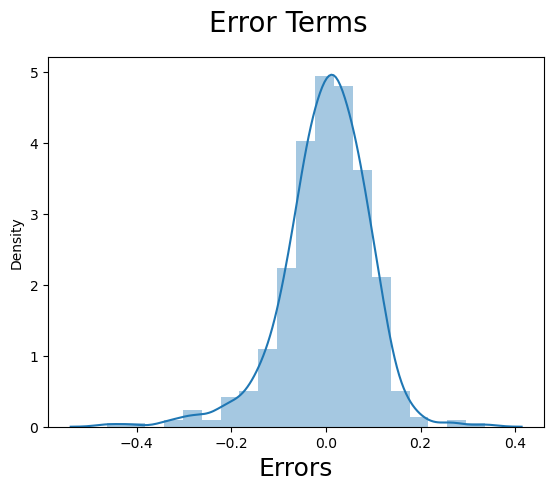

In [103]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### There is a linear relationship between X and Y

Ther is a linear relationship between temp and cnt.

#### There is No Multicollinearity between the predictor variables

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features   VIF
2            temp  4.81
3       windspeed  4.67
13   weathersit_F  2.91
6   season_winter  2.68
4   season_spring  2.59
0              yr  1.98
5   season_summer  1.86
9        mnth_Nov  1.84
8        mnth_Jan  1.51
7        mnth_Dec  1.49
10      mnth_Sept  1.20
11   weekday_Tues  1.17
12   weathersit_C  1.12
1         holiday  1.06


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## Making Prediction using Final Model

#### Applying the scaling on the test sets

In [105]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [106]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,1,0.353092,0.904250,0.189757,879.0,1576.0,0,1,...,0,0,0,0,0,0,0,1,0,0
396,1,0,1,0.510926,0.523401,0.310919,304.0,4275.0,1,0,...,0,0,0,0,1,0,0,0,0,1
175,0,0,1,0.792325,0.498067,0.355294,1782.0,3420.0,0,0,...,0,0,0,0,0,0,0,1,0,1
454,1,0,0,0.454854,0.760841,0.444127,2301.0,3934.0,0,1,...,0,0,0,0,0,0,1,0,0,0
234,0,0,1,0.724830,0.469300,0.219363,1281.0,4614.0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [107]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.486289,0.025594,0.696527,0.539238,0.643969,0.317546,828.853748,3634.594150,0.248629,0.254113,...,0.084095,0.063985,0.146252,0.149909,0.13894,0.146252,0.135283,0.137112,0.029250,0.628885
std,0.500269,0.158066,0.460179,0.225899,0.147268,0.167984,677.032972,1567.077246,0.432614,0.435760,...,0.277784,0.244951,0.353682,0.357309,0.34620,0.353682,0.342339,0.344280,0.168662,0.483545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.528982,0.197183,309.500000,2472.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538962,0.645771,0.294759,695.000000,3658.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.743521,0.750751,0.406464,1056.000000,4742.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6911.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [108]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 333 to 432
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             183 non-null    int64  
 1   holiday        183 non-null    int64  
 2   workingday     183 non-null    int64  
 3   temp           183 non-null    float64
 4   hum            183 non-null    float64
 5   windspeed      183 non-null    float64
 6   casual         183 non-null    float64
 7   registered     183 non-null    float64
 8   season_spring  183 non-null    uint8  
 9   season_summer  183 non-null    uint8  
 10  season_winter  183 non-null    uint8  
 11  mnth_Aug       183 non-null    uint8  
 12  mnth_Dec       183 non-null    uint8  
 13  mnth_Feb       183 non-null    uint8  
 14  mnth_Jan       183 non-null    uint8  
 15  mnth_Jul       183 non-null    uint8  
 16  mnth_Jun       183 non-null    uint8  
 17  mnth_Mar       183 non-null    uint8  
 18  mnth_May

In [109]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 333 to 432
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          183 non-null    float64
 1   yr             183 non-null    int64  
 2   holiday        183 non-null    int64  
 3   temp           183 non-null    float64
 4   windspeed      183 non-null    float64
 5   season_spring  183 non-null    uint8  
 6   season_summer  183 non-null    uint8  
 7   season_winter  183 non-null    uint8  
 8   mnth_Dec       183 non-null    uint8  
 9   mnth_Jan       183 non-null    uint8  
 10  mnth_Nov       183 non-null    uint8  
 11  mnth_Sept      183 non-null    uint8  
 12  weekday_Tues   183 non-null    uint8  
 13  weathersit_C   183 non-null    uint8  
 14  weathersit_F   183 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 10.4 KB


In [110]:
# Making predictions using the final model (lr7)

y_pred = lr7.predict(X_test_lm7)

### Model Evaluation

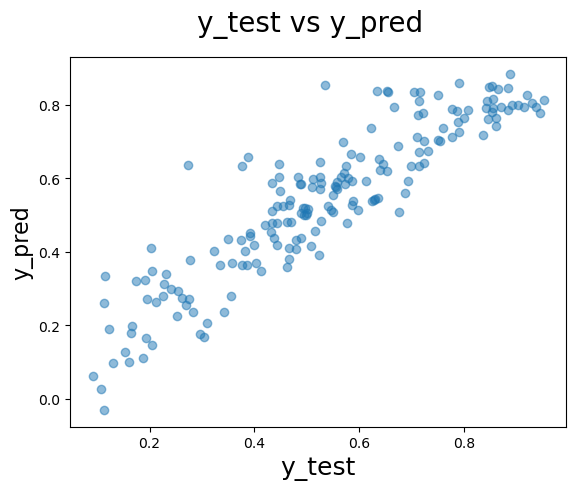

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R^2 value for Test

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.8199394738084042

In [113]:
# We already have the value of R^2 (calculated in above step)

r2=0.8199394738084042

In [114]:
# Get the shape of X_test
X_test.shape

(183, 14)

In [115]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8049344299591046

## Final Result comparison

1. Train R^2 :0.836
2. Train Adjusted R^2 : 0.831
3. Test R^2 :0.819
4. Test Adjusted R^2 :0.804

This seems to be a really good model that can very well 'Generalize' various datasets.

## Final Report Conculsion:

According to our final model, the top 3 predictor variables influencing bike bookings are:

1. Temperature (temp): The coefficient of '0.4207' suggests that a one-unit increase in the temperature variable leads to a 0.4207 -unit increase in bike hires.

2. Weather Situation C (weathersit_C) (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered): The coefficient of '-0.1903' indicates that, concerning Weathersit_3, a one-unit increase in the Weathersit_3 variable results in a decrease of 0.1903 units in bike hires.

3. Year (yr): With a coefficient value of '0.2333,' a one-unit increase in the year variable corresponds to a 0.2333 -unit increase in bike hires.

Therefore, it is recommended to prioritize these variables for planning to maximize bike bookings.